# 第１章　基本的なクラスタリングを行う10本ノック

## ノック1:k-meansで非階層型クラスタリングを実施してみよう




In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


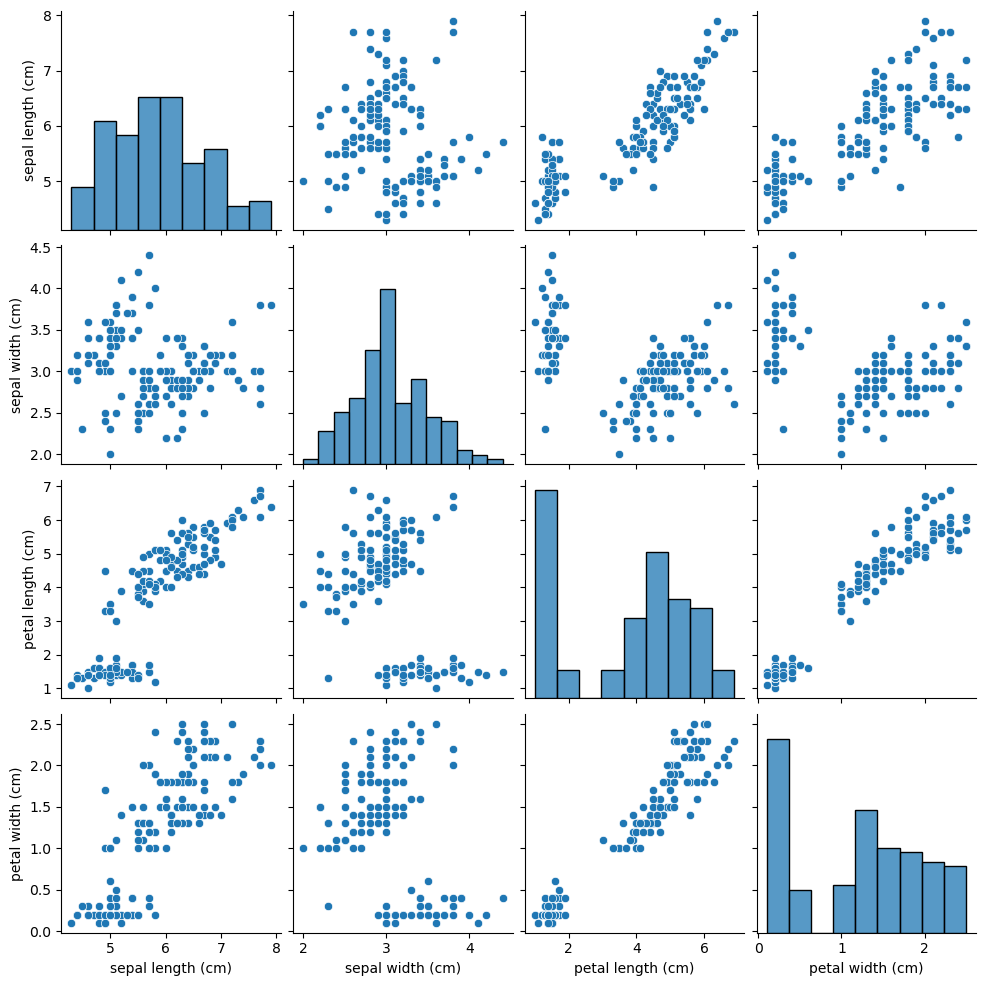

In [7]:
import seaborn as sns
df_temp = df_iris.copy()
sns.pairplot(df_temp)

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0, init="random")
cls_data = df_iris.copy()
model.fit(cls_data)

params = model.get_params()
print(params)


c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{'algorithm': 'lloyd', 'copy_x': True, 'init': 'random', 'max_iter': 300, 'n_clusters': 3, 'n_init': 'warn', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}


In [9]:
cluster = model.predict(cls_data)
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


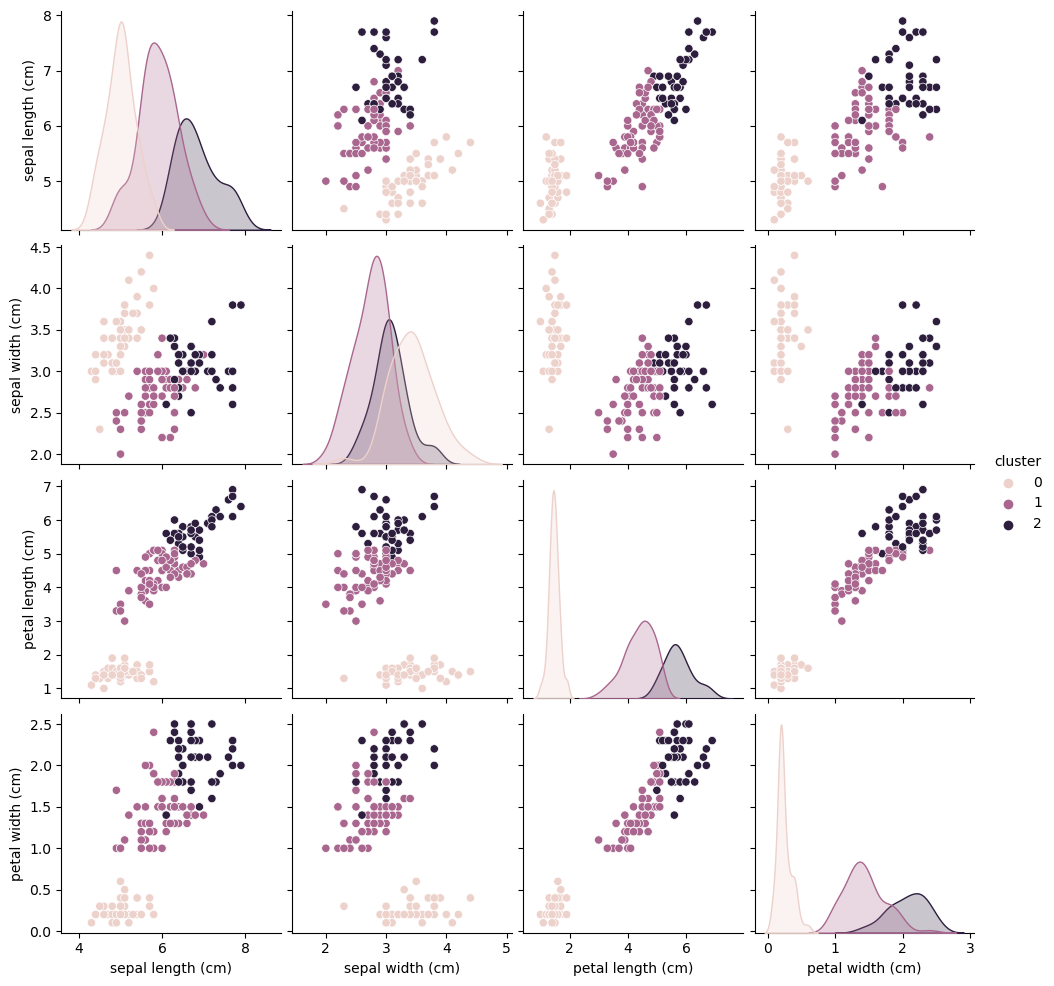

In [10]:
cls_data["cluster"] = cluster
sns.pairplot(cls_data, hue="cluster")

In [11]:
cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


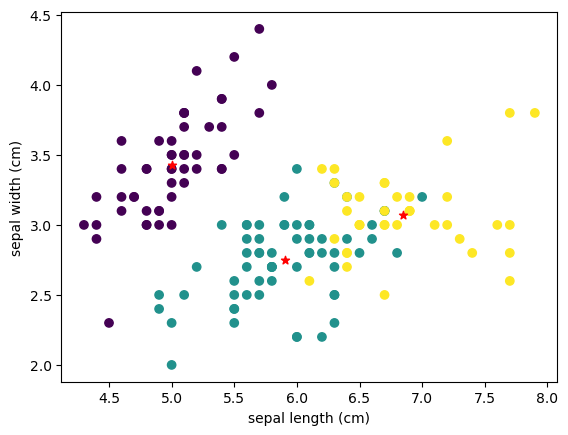

In [12]:
plt.scatter(cls_data["sepal length (cm)"],cls_data["sepal width (cm)"],c=cls_data["cluster"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(cluster_center["sepal length (cm)"],cluster_center["sepal width (cm)"],marker="*",color="red")

In [13]:
display(cls_data.groupby("cluster").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.01,3.43,1.46,0.25
1,5.90,2.75,4.39,1.43
2,6.85,3.07,5.74,2.07


In [14]:
cls_data["target"] = iris.target
cls_data.loc[cls_data["target"] == 0, "target"] = "setosa"
cls_data.loc[cls_data["target"] == 1, "target"] = "versicolor"
cls_data.loc[cls_data["target"] == 2, "target"] = "virginica"
display(cls_data.groupby("target").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.04
virginica,6.59,2.97,5.55,2.03,1.72


## ノック2:クラスタリングの結果を評価してみよう

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
ari = "ARI: {:.2f}".format(adjusted_rand_score(iris.target, cls_data["cluster"]))
accuracy = "Accuracy:{:.2f}".format(accuracy_score(iris.target,cls_data["cluster"]))
print(ari)
print(accuracy)

ARI: 0.73
Accuracy:0.89


## ノック3:k-means++で非階層型クラスタリングを実施してみよう




c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


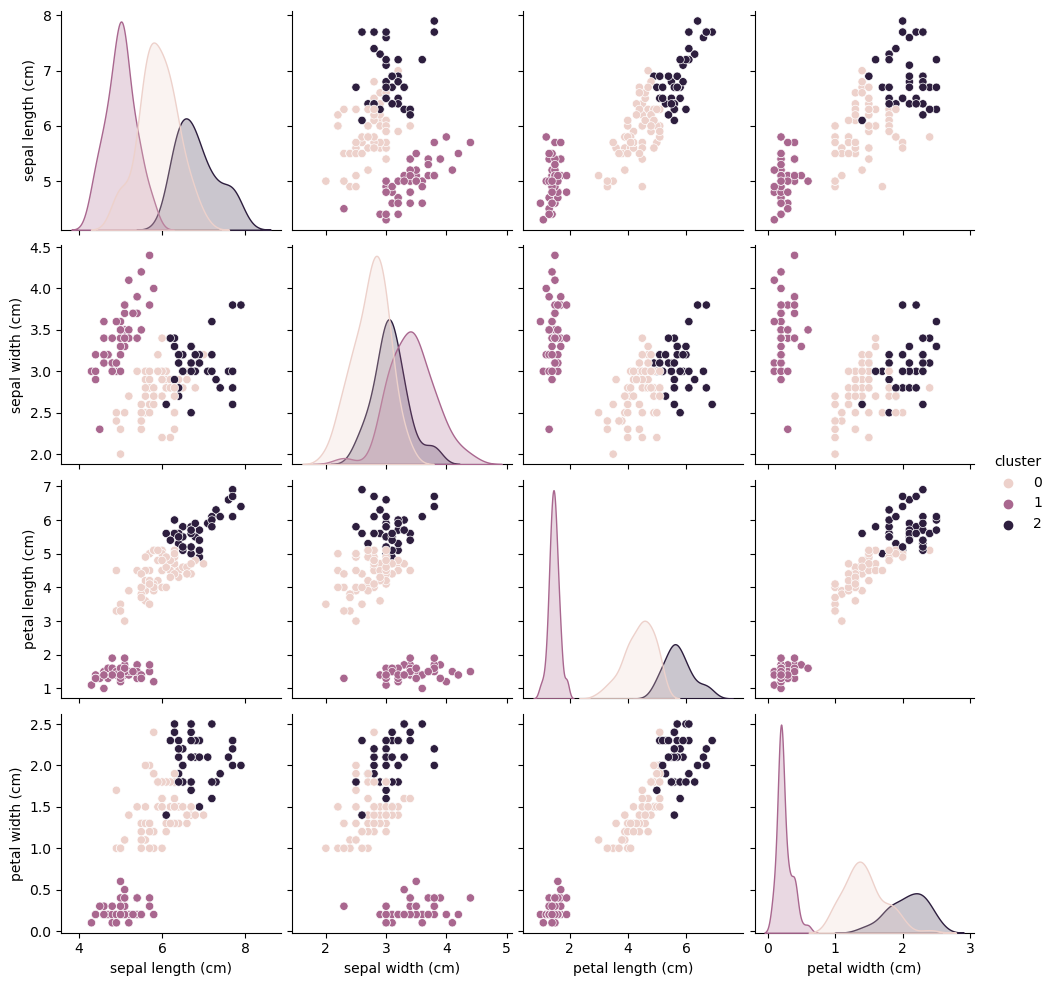

In [16]:
model = KMeans(n_clusters=3,random_state=0,init="k-means++")
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data["cluster"] = cluster
sns.pairplot(cls_data,hue="cluster")

In [17]:
ari = "ARI:{:.2f}".format(adjusted_rand_score(iris.target,cls_data["cluster"]))
print(ari)

ARI:0.73


c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ARI:0.54


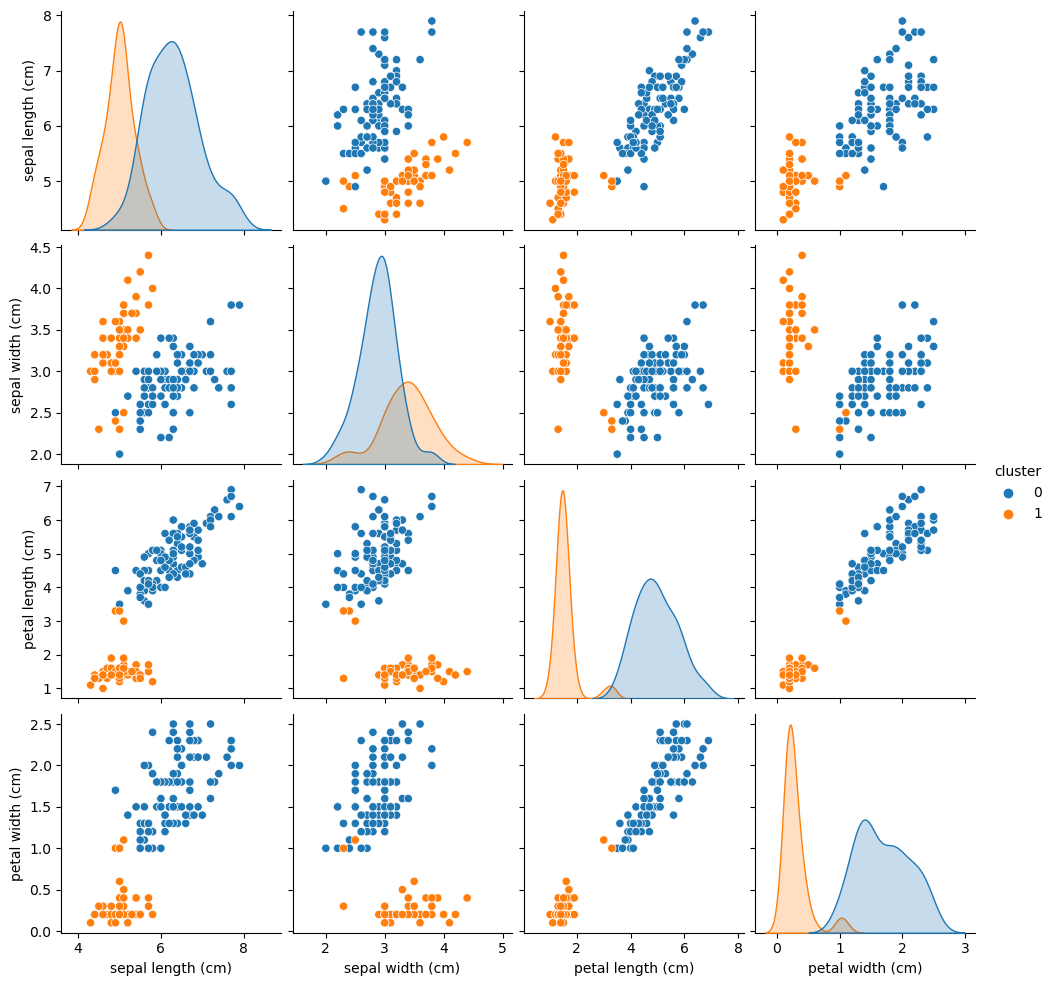

In [18]:
model = KMeans(n_clusters=2,random_state=0)
cls_data - df_iris.copy()
cls_data["cluster"] = model.fit_predict(cls_data)
sns.pairplot(cls_data,hue="cluster")
print("ARI:{:.2f}".format(adjusted_rand_score(iris.target,cls_data["cluster"])))

## ノック4:エルボー法で最適なクラスター数を探索してみよう  




<function matplotlib.pyplot.show(close=None, block=None)>

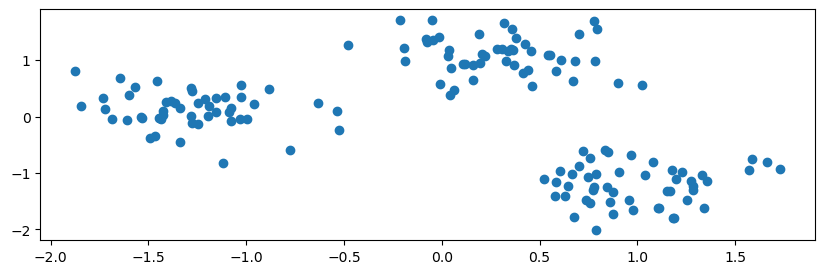

In [19]:
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing
X,y=make_blobs(n_samples=150,  #サンプル点の総数
               n_features=2,  #説明変数（次元数）指定 default:2
               centers=3, #クラスタの個数
               cluster_std=0.5, #クラスタ内の標準偏差
               shuffle=True, #サンプルをシャッフル
               random_state=0) #乱数生成器の状態を指定
sc=preprocessing.StandardScaler()
X_norm=sc.fit_transform(X)
x=X_norm[:,0]
y=X_norm[:,1]
plt.figure(figsize=(10,3))
plt.scatter(x,y)
plt.show

In [20]:
distortions =[]
for i in range(1,11):
    km = KMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

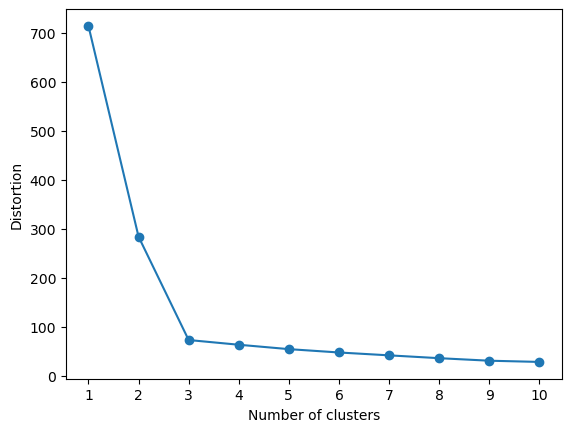

In [21]:
plt.plot(range(1,11),distortions,marker="o")
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

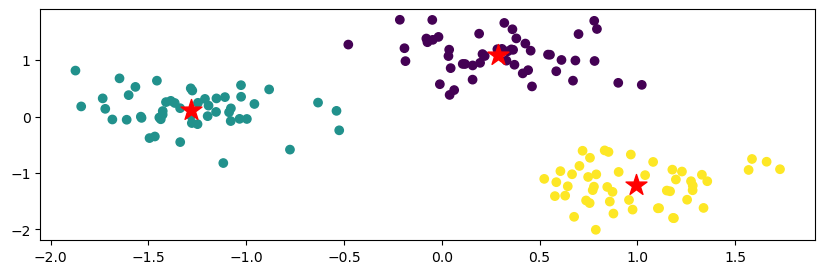

In [22]:
km = KMeans(n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=0)
z_km=km.fit(X_norm)
plt.figure(figsize=(10,3))
plt.scatter(x,y,c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250,marker="*",c="red")
plt.show

## ノック5:シルエット分析で最適なクラスター数を探索してみよう




In [23]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(z_km.labels_)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(X,z_km.labels_)

50
50
50


([<matplotlib.axis.YTick at 0x251bcc7afb0>,
 [Text(0, 25.0, '1'), Text(0, 75.0, '2'), Text(0, 125.0, '3')])

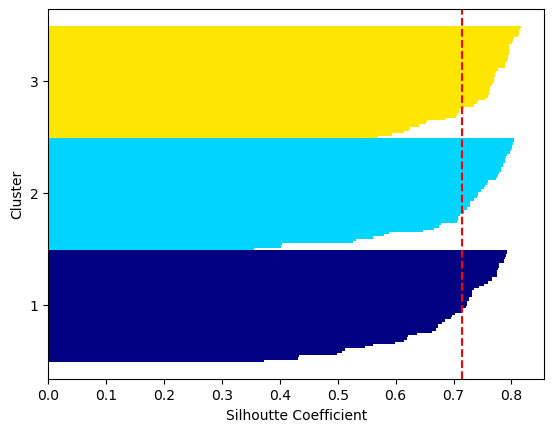

In [24]:
y_ax_lower,y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
    c_silhouette_vals=silhouette_vals[z_km.labels_==c]
    print(len(c_silhouette_vals))
    c_silhouette_vals.sort()
    y_ax_upper +=len(c_silhouette_vals)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor="none",
             color=color
             )
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.ylabel("Cluster")
plt.xlabel("Silhoutte Coefficient")
plt.yticks(yticks,cluster_labels +1)


c:\Users\PC_User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

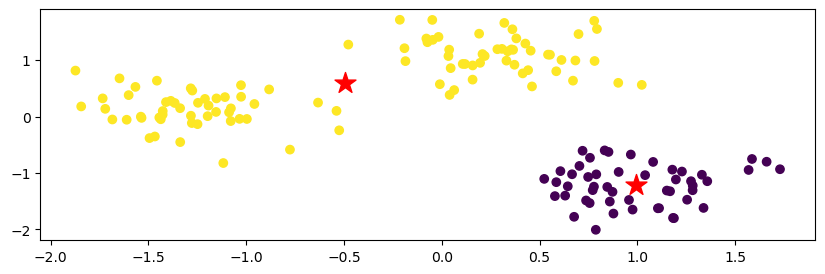

In [25]:
km = KMeans(n_clusters=2,
                n_init=10,
                max_iter=300,
                random_state=0)
z_km=km.fit(X_norm)

plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250,marker="*",c="red")
plt.show

50
100


([<matplotlib.axis.YTick at 0x251be917580>,
 [Text(0, 25.0, '1'), Text(0, 100.0, '2')])

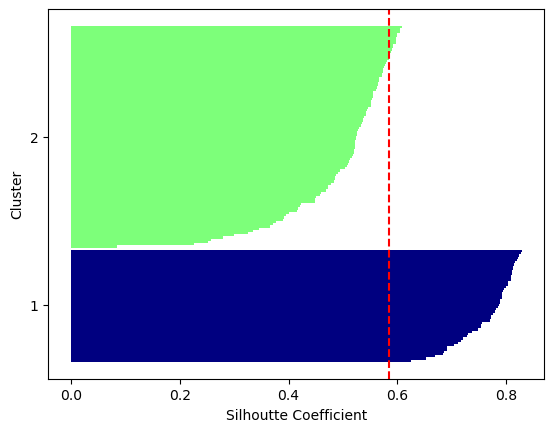

In [27]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels=np.unique(z_km.labels_)
n_clusters=cluster_labels.shape[0]

silhouette_vals=silhouette_samples(X,z_km.labels_,metric="euclidean")

y_ax_lower,y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
    c_silhouette_vals=silhouette_vals[z_km.labels_==c]
    print(len(c_silhouette_vals))
    c_silhouette_vals.sort()
    y_ax_upper +=len(c_silhouette_vals)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor="none",
             color=color
             )
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.ylabel("Cluster")
plt.xlabel("Silhoutte Coefficient")
plt.show
plt.yticks(yticks,cluster_labels +1)

## ノック6:階層型クラスタリングを実施してみよう

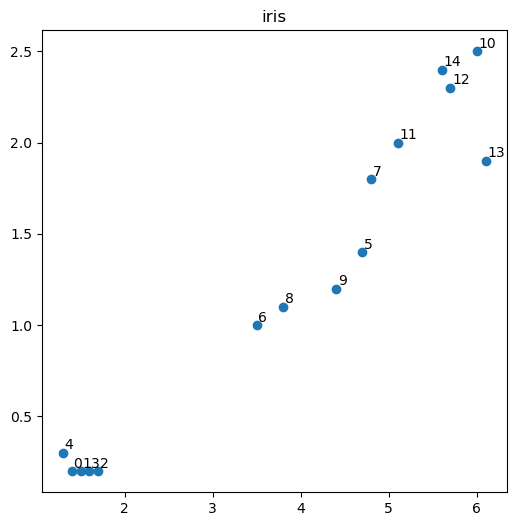

In [28]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X = load_iris().data[::10,2:4]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1,title="iris")
plt.scatter(X[:,0],X[:,1])
for i, element in enumerate(X):
    plt.text(element[0]+0.02,element[1]+0.02,i)
    plt.show

In [31]:
import pandas as pd
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method="ward",metric="euclidean")
pd.DataFrame(Z)

,0,1,2,3
0,2.0,3.0,0.100000,2.0
1,0.0,1.0,0.100000,2.0
2,12.0,14.0,0.141421,2.0
3,4.0,16.0,0.208167,3.0
4,6.0,8.0,0.316228,2.0
5,5.0,9.0,0.360555,2.0
6,7.0,11.0,0.360555,2.0
7,15.0,18.0,0.390726,5.0
8,10.0,17.0,0.439697,3.0
9,13.0,23.0,0.735980,4.0


## ノック7:樹形図(デンドログラム)を解釈してみよう

C:\Users\PC_User\AppData\Local\Temp\ipykernel_10328\605557102.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


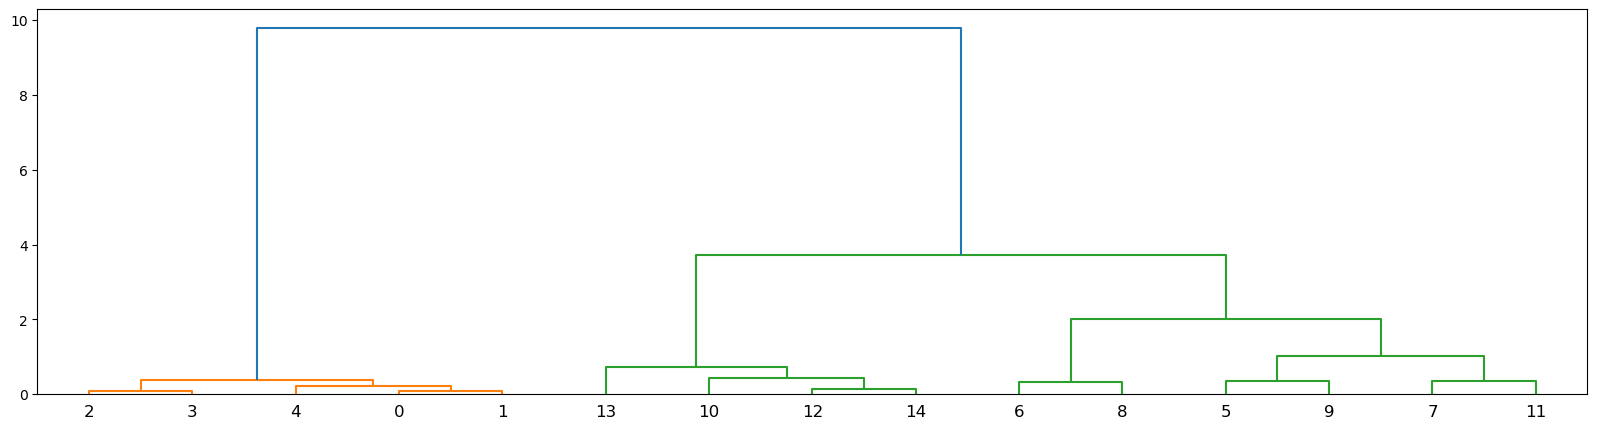

In [33]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

fig2,ax2 = plt.subplots(figsize=(20,5))
ax2 = dendrogram(Z)
fig2.show()

In [35]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z,t=3,criterion="maxclust")
for i,c in enumerate(clusters):
    print(i,c)

0 1
1 1
2 1
3 1
4 1
5 3
6 3
7 3
8 3
9 3
10 2
11 3
12 2
13 2
14 2


In [36]:
clusters1 = fcluster(Z, 1.6, criterion="distance")
for i, c in enumerate(clusters1):
    print(i,c)

0 1
1 1
2 1
3 1
4 1
5 4
6 3
7 4
8 3
9 4
10 2
11 4
12 2
13 2
14 2


## ノック8:最短距離法で階層型クラスタリングを実施してみよう

## ノック9:最長距離法で階層型クラスタリングを実施してみよう

## ノック10:群平均法で階層型クラスタリングを実施してみよう